# Visualize

In [1]:
import os, sys
sys.path.append('../src/')
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from visualize import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

## path

In [14]:
result_path = '../data/result_201808052028'
history_path = glob.glob(os.path.join(result_path, 'history*'))

In [17]:
# history : (train_loss, test_loss, acc)
history = np.array([np.load(h_path) for h_path in history_path])

In [ ]:
for h, h_path in zip(history, history_path):
    title, _ = os.path.basename(h_path).split('.')

## min(train_loss), min(test_loss), max(acc)

In [123]:
loss_acc = np.array([[min(h.T[0]), min(h.T[1]), max(h.T[2])] for h in history])
train_loss, test_loss, acc = loss_acc.T
df_train_loss = pd.DataFrame({'train_loss' : train_loss,
                              'model' : 'CNN-BGRU'})
df_test_loss = pd.DataFrame({'test_loss' : test_loss,
                              'model' : 'CNN-BGRU'})
df_acc = pd.DataFrame({'acc' : acc,
                       'model' : 'CNN-BGRU'})

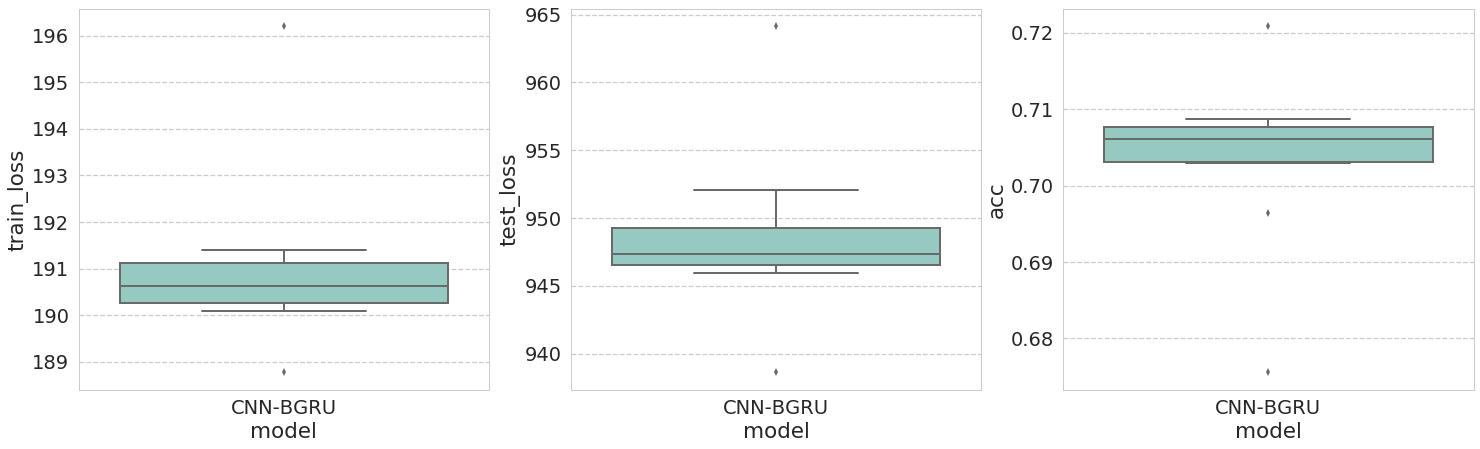

In [134]:
loss_acc_plot(df_train_loss, df_test_loss, df_acc, title='', 
              show=True, save=False, save_path='')

## train loss, test loss, accuracy

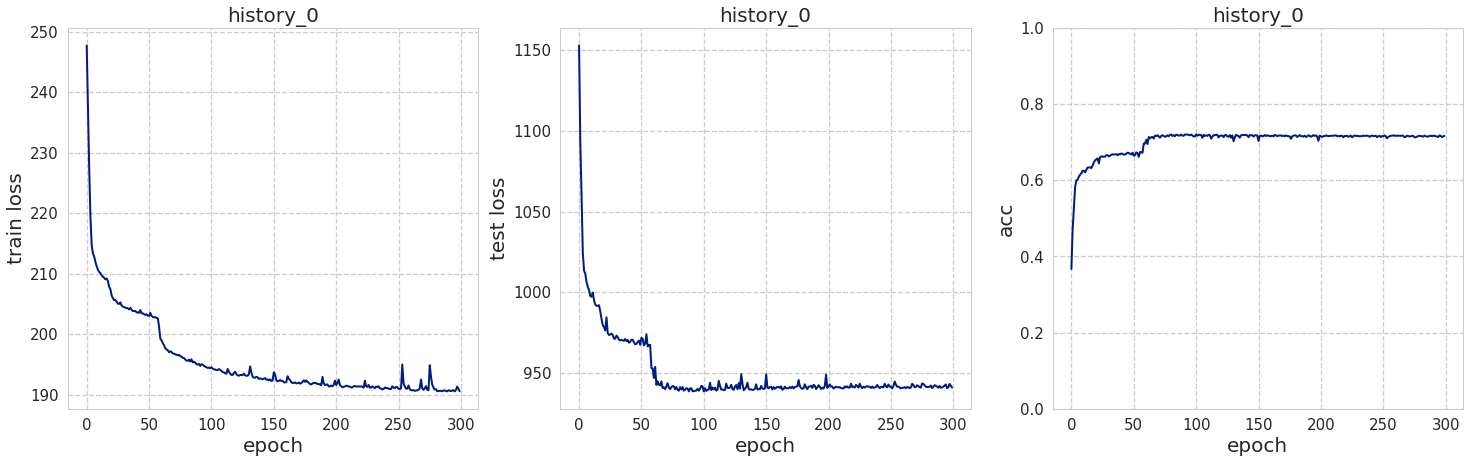

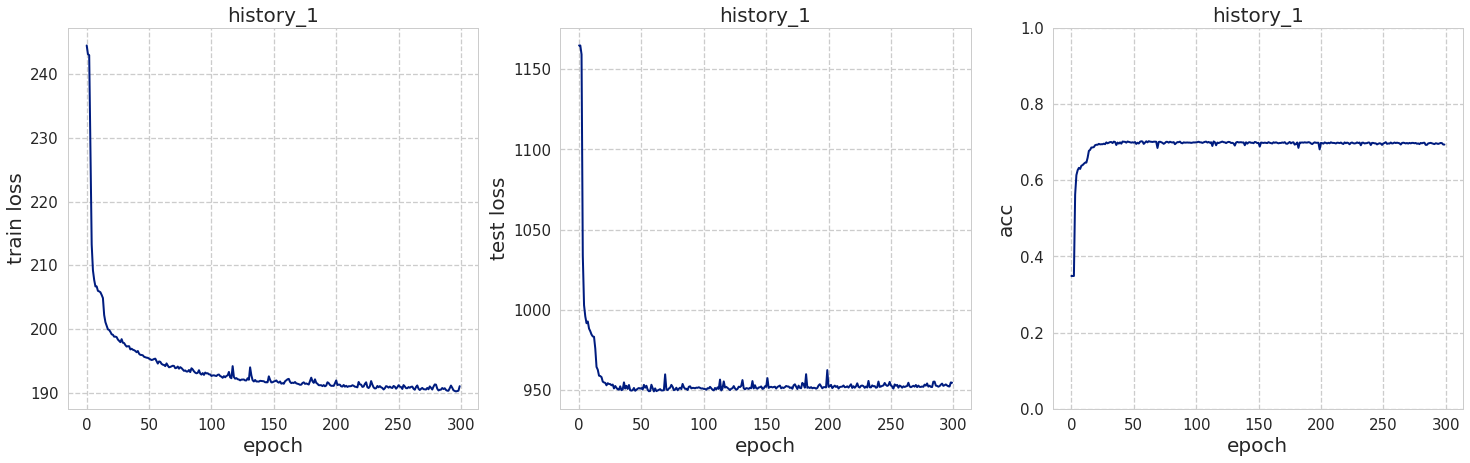

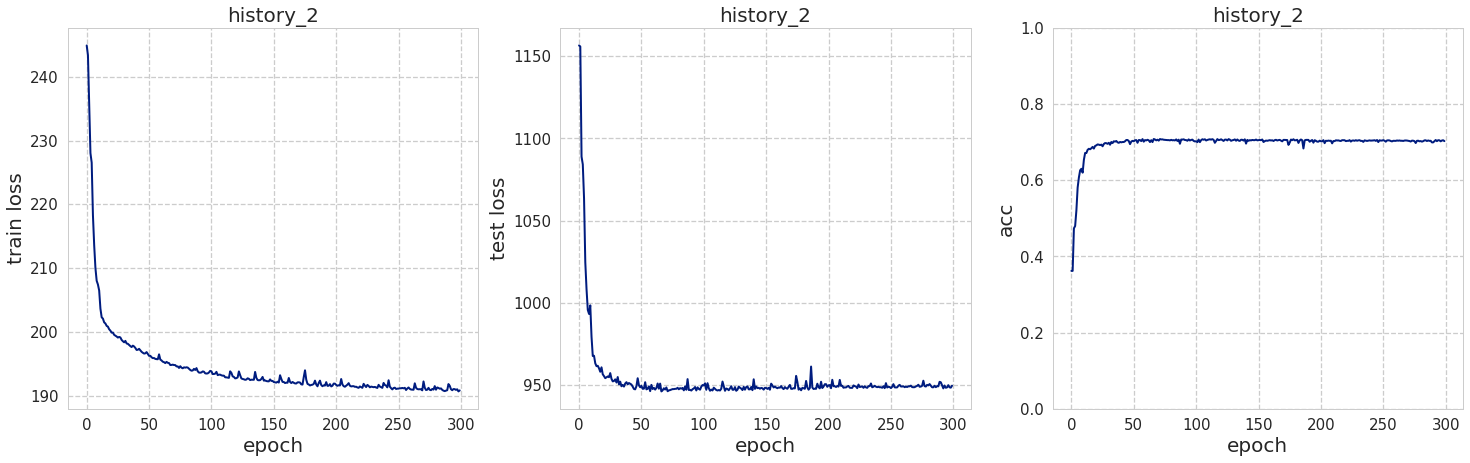

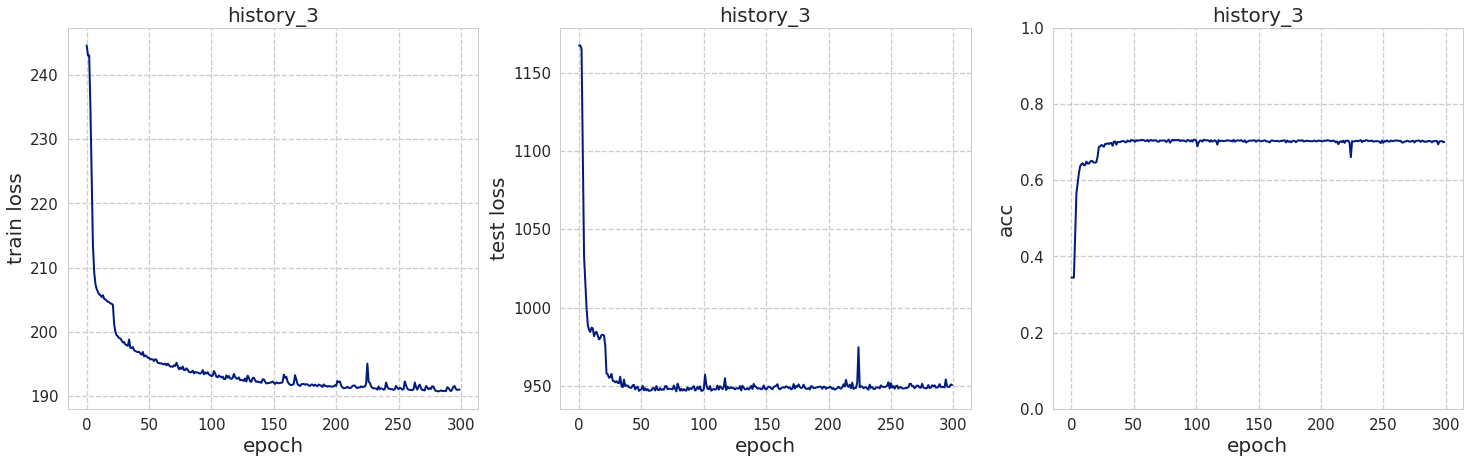

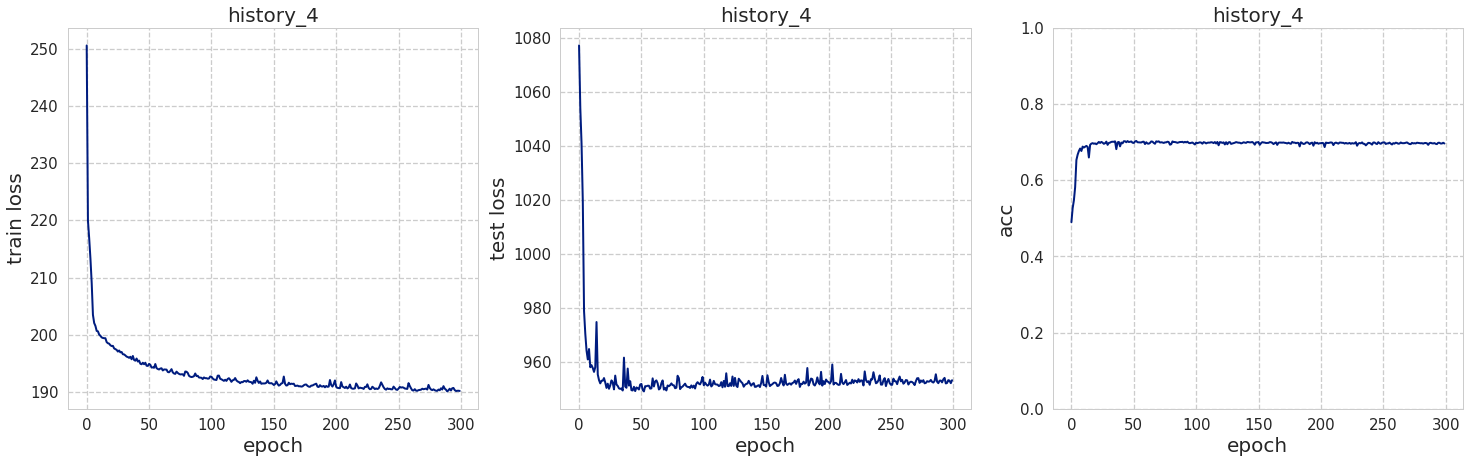

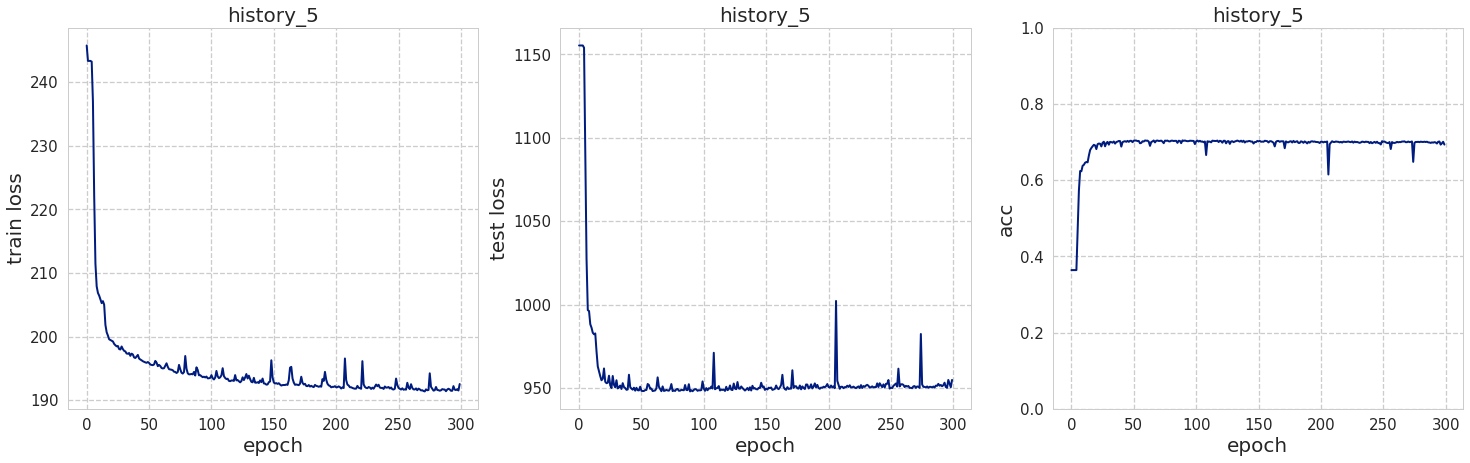

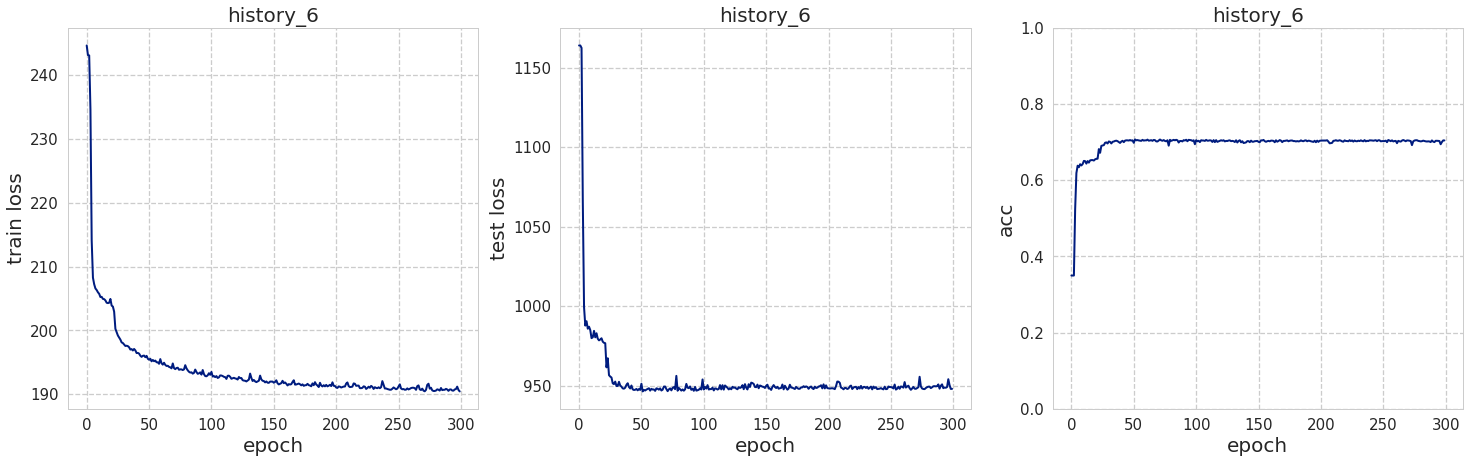

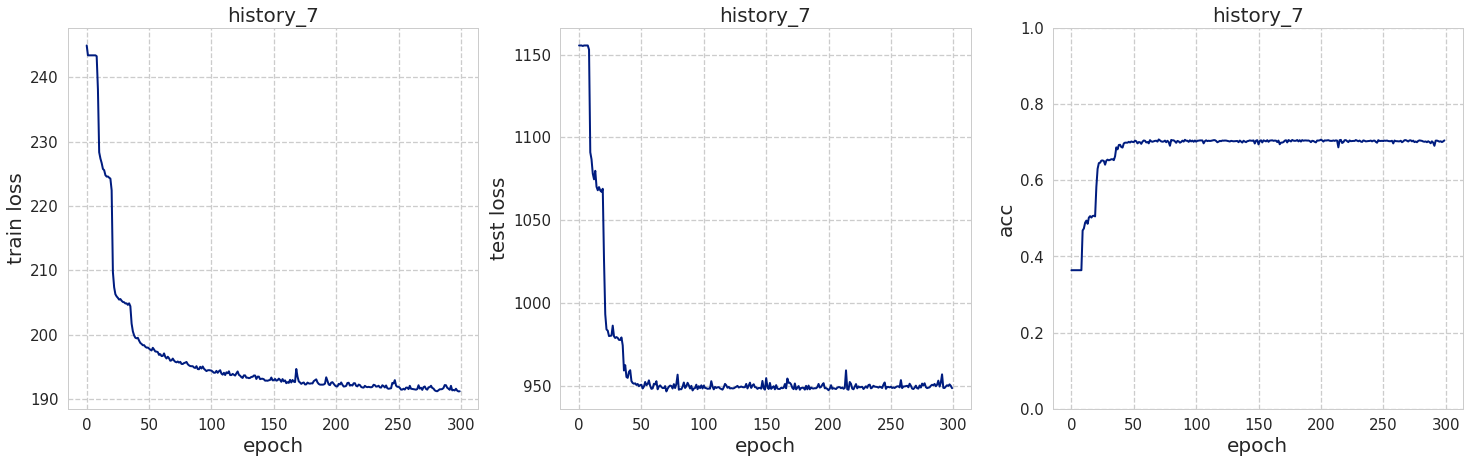

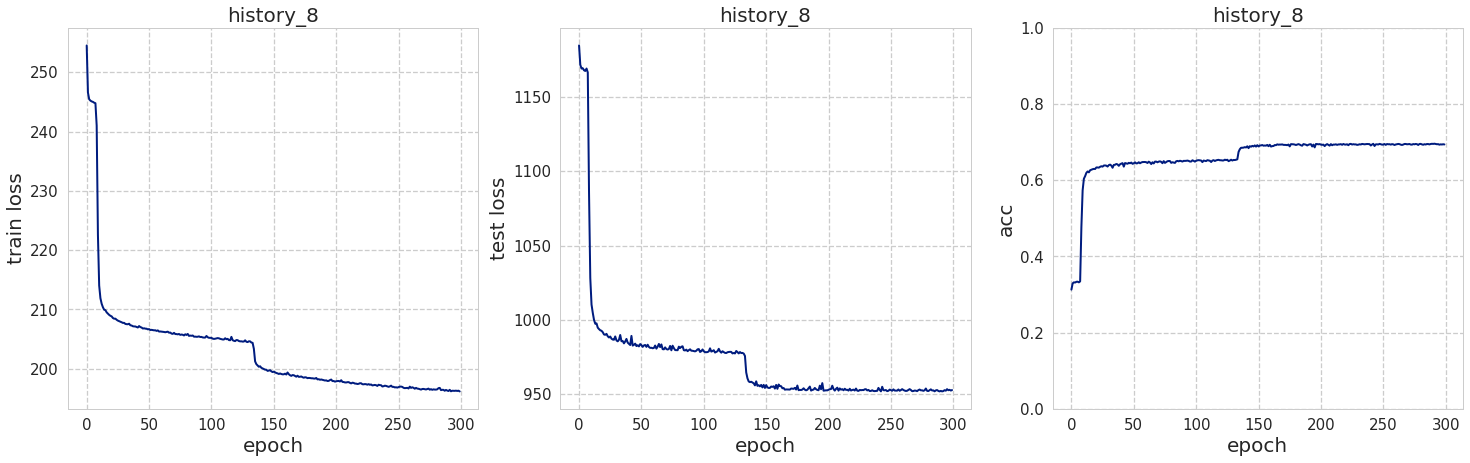

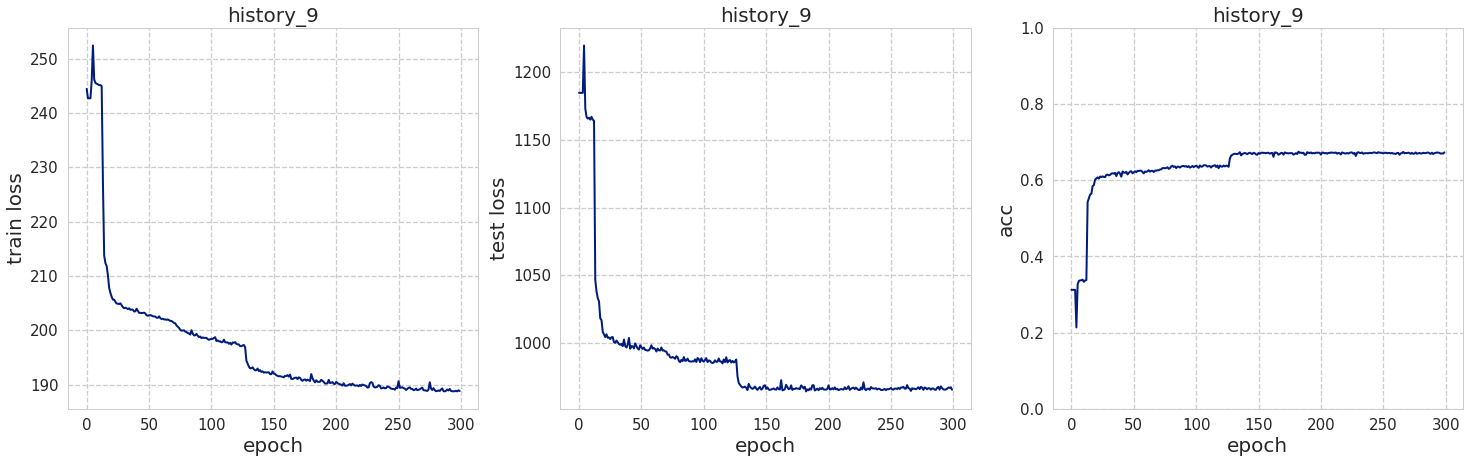

In [131]:
for h, h_path in zip(history, history_path):
    title, _ = os.path.basename(h_path).split('.')    
    history_plot(h.T, title=title, show=True, save=False, save_path='')